### Importing required modules

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

### Reading and understanding data

In [100]:
data = {'Marketing Spend' : [23 , 26, 30 , 34 , 43 , 48],
        'Sales': [651 , 762 , 856 ,1063 , 1190 , 1298]}
data = pd.DataFrame(data)
data

,Marketing Spend,Sales
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298


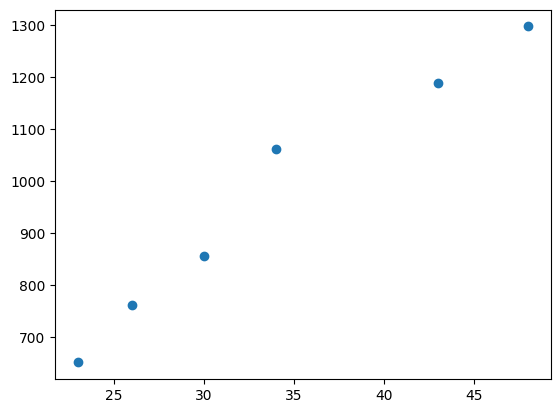

In [101]:
plt.scatter(data['Marketing Spend'],data['Sales'])
plt.show()

### LR -- Model Building

In [102]:
X = data['Marketing Spend'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

In [103]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.transform(y)

In [104]:
lr1 = LinearRegression()
lr1.fit(X,y)

LinearRegression()

In [105]:
y_test_pred = lr1.predict(X)
print(r2_score(y,y_test_pred))

0.9652190930694494


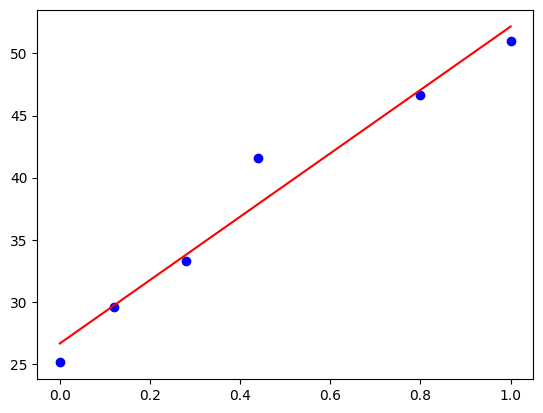

In [106]:
plt.scatter(X,y,color='blue')
plt.plot(X,y_test_pred,color='red')
plt.show()

In [107]:
print(lr1.coef_)
print(lr1.intercept_)

[[25.5251046]]
[26.64895397]


In [108]:
rss = np.sum(np.square(y - y_test_pred))
print('RSS:',rss)

mse = mean_squared_error(y,y_test_pred)
print('MSE:',mse)

rmse = np.sqrt(mse)
print('RMSE:',rmse)

RSS: 17.955517991631773
MSE: 2.9925863319386288
RMSE: 1.7299093421155425


### Polynomial Reg -- Model Building

In [109]:
X = data['Marketing Spend'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

In [110]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.transform(y)

In [111]:
poly_reg = PolynomialFeatures(degree=5)  # Want to generate features with degree <= to the specified degree
X_poly = poly_reg.fit_transform(X)  # Transform the variable X to 1, X, X^2, X^3, X^4, X^5
print(X_poly)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.20000000e-01 1.44000000e-02 1.72800000e-03
  2.07360000e-04 2.48832000e-05]
 [1.00000000e+00 2.80000000e-01 7.84000000e-02 2.19520000e-02
  6.14656000e-03 1.72103680e-03]
 [1.00000000e+00 4.40000000e-01 1.93600000e-01 8.51840000e-02
  3.74809600e-02 1.64916224e-02]
 [1.00000000e+00 8.00000000e-01 6.40000000e-01 5.12000000e-01
  4.09600000e-01 3.27680000e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


In [112]:
lr2 = LinearRegression()
lr2.fit(X_poly,y)

LinearRegression()

In [113]:
print(lr2.coef_)
print(lr2.intercept_)

[[    0.            76.16360439  -513.80903984  1842.27900929
  -2465.69799431  1086.94442047]]
[25.12]


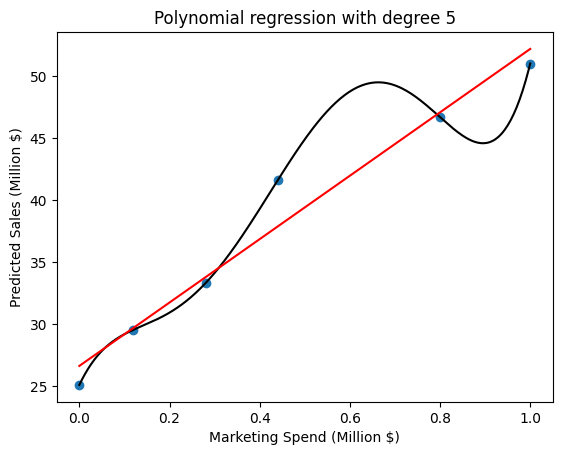

In [114]:
# Plotting the polynomial regression(degree-5) and simple linear regression
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1) # Between 0 and 1 we get 300 equally spaced values
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,lr2.predict(poly_reg.fit_transform(X_seq)),color="black") # model fit with polynomial regression
plt.plot(X_seq,lr1.predict(X_seq),color="red") # model fit with linear regression
plt.title("Polynomial regression with degree "+str(5))
plt.xlabel("Marketing Spend (Million $)")
plt.ylabel("Predicted Sales (Million $)")
plt.show()

In [115]:
y_test_pred = lr2.predict(X_poly)
print(r2_score(y,y_test_pred))

1.0


In [116]:
rss = np.sum(np.square(y - y_test_pred))
print('RSS:',rss)

mse = mean_squared_error(y,y_test_pred)
print('MSE:',mse)

rmse = np.sqrt(mse)
print('RMSE:',rmse)

RSS: 3.9190609771379866e-26
MSE: 6.531768295229978e-27
RMSE: 8.081935594416709e-14


**Since the model to too trained.. in other way it is overfitted.**
**So we need to reduce the overfitting using Ridge and Lasso Regression.**

### Ridge Regression

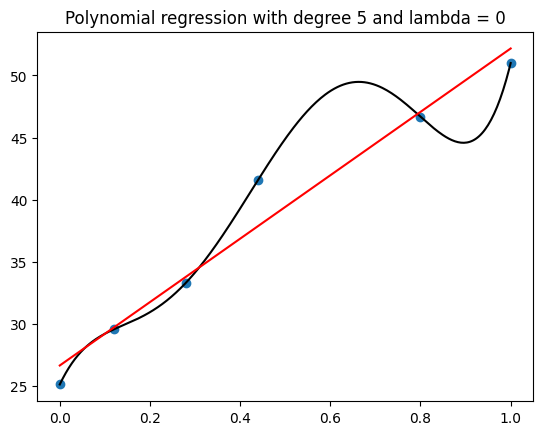

r2 score = 1.0
[[    0.            76.16360439  -513.80903984  1842.27900929
  -2465.69799431  1086.94442047]]


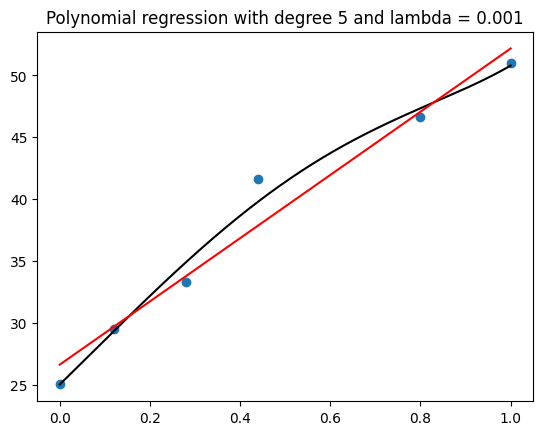

r2 score = 0.9877944050899673
[[  0.          35.89613711   3.18136705 -17.76646241  -9.85886283
   14.2964244 ]]


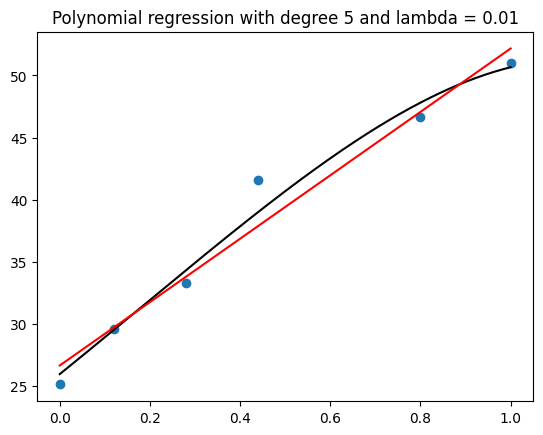

r2 score = 0.9809539612050426
[[ 0.         29.3895799   3.36972798 -4.64791164 -3.8411481   0.44116215]]


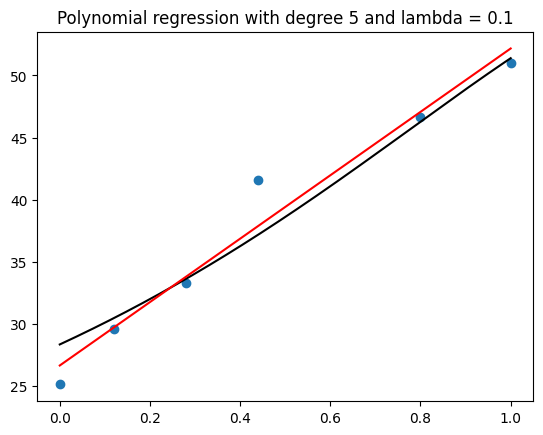

r2 score = 0.9396437428481395
[[ 0.         16.82923718  6.8627317   1.8402746  -0.62015971 -1.86386263]]


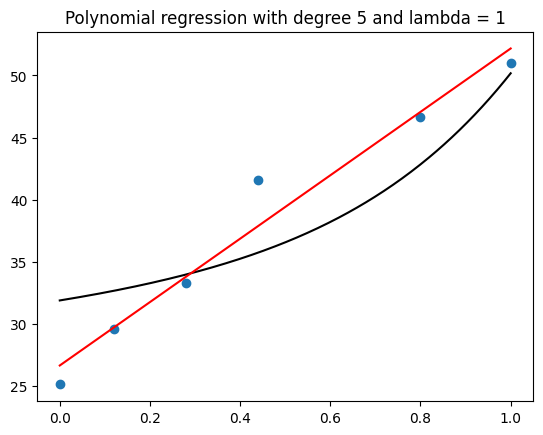

r2 score = 0.7953946450161844
[[0.         5.91803061 4.31887523 3.26808435 2.61030503 2.17616609]]


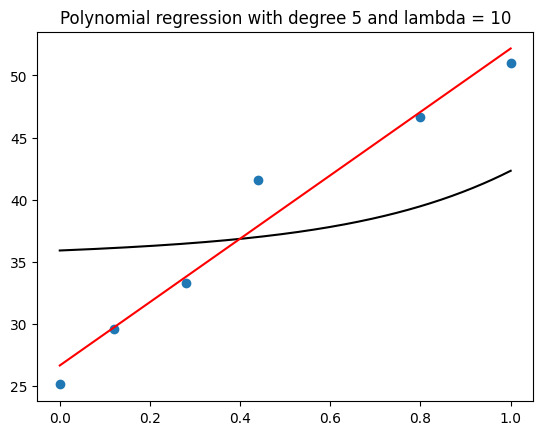

r2 score = 0.38495051893643784
[[0.         1.47972521 1.38359432 1.26750148 1.17771003 1.11051713]]


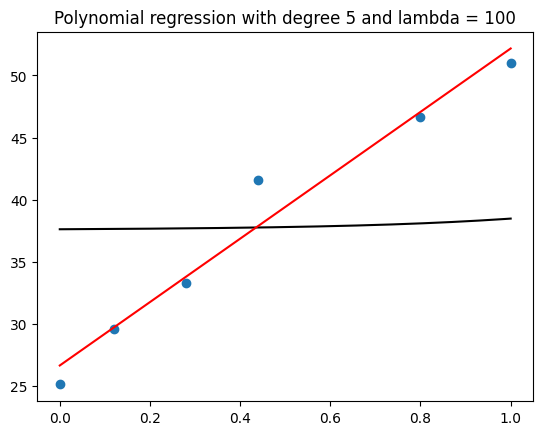

r2 score = 0.058590880289601355
[[0.         0.18890276 0.18304523 0.17137913 0.16156562 0.15393148]]


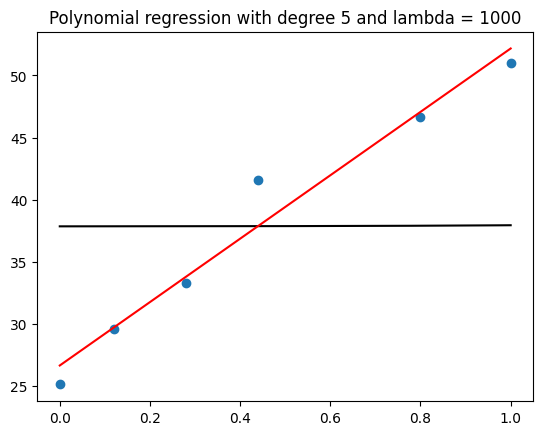

r2 score = 0.006166338591996889
[[0.         0.01945627 0.01892343 0.01775657 0.01676401 0.01598817]]


In [117]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1) # Between 0 and 1 we get 300 equally spaced values
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda, more the regularization

for i in lambdas: # for each lambda we get different model coefficients
    degree = 5 # Degree for polynomial regression - chose 5 since this is the lowest number that gave a perfect fit
    # Creating degree 5 features
    ridgecoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
    X_poly = ridgecoef.fit_transform(X)
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_poly, y) # fit the model on the polynomial features

    # Plotting the ridge regression model for each lambda
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,ridgereg.predict(ridgecoef.fit_transform(X_seq)),color="black") # Polynomial Regression
    plt.plot(X_seq,lr1.predict(X_seq),color="red") # Linear Regression
    plt.title("Polynomial regression with degree "+str(degree) + " and lambda = " + str(i))
    plt.show()

    #Computing the r2 score
    y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
    print("r2 score = " + str(r2_score(y, y_pred)))
    print(ridgereg.coef_) # model coefficients

### Lasso Regression

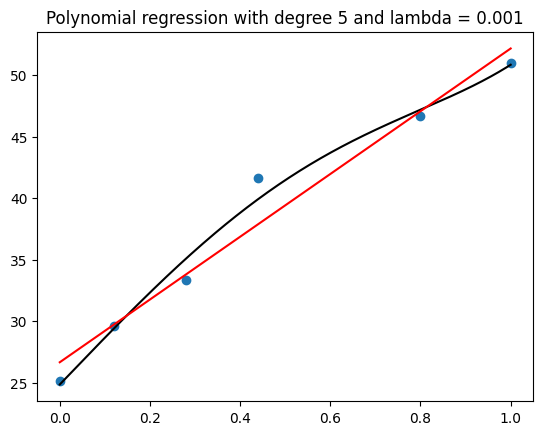

r2 score = 0.9877652428687107
[ 0.00000000e+00  3.81657809e+01  8.34155093e-01 -2.41910940e+01
 -4.02313318e-04  1.12003111e+01]


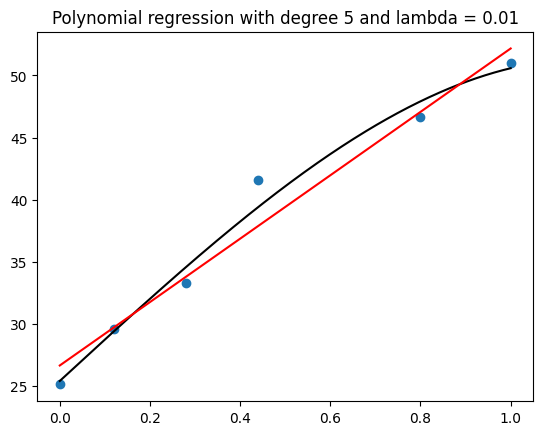

r2 score = 0.9840753094235805
[ 0.         33.41245276 -0.         -8.22784519 -0.          0.        ]


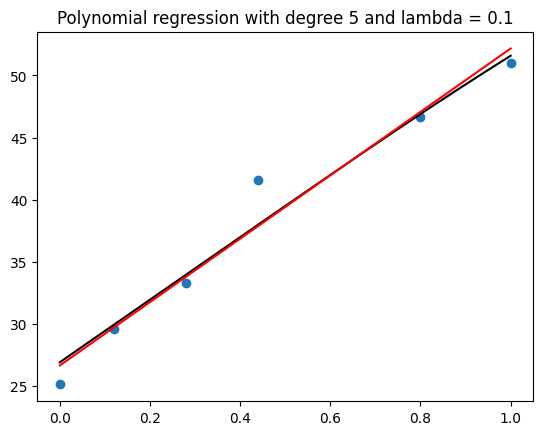

r2 score = 0.9667248487851063
[ 0.         25.20540678 -0.         -0.         -0.         -0.52667452]


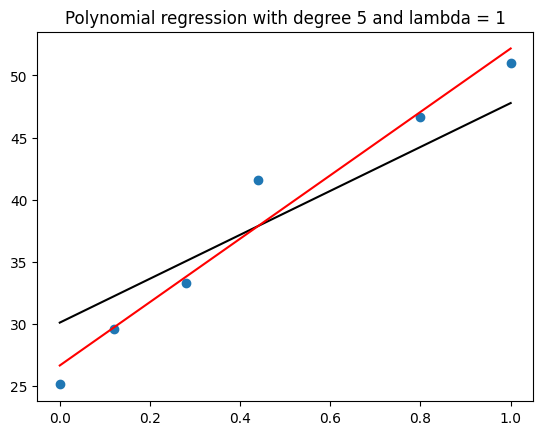

r2 score = 0.8740395134983124
[ 0.         17.67991632  0.          0.          0.          0.        ]


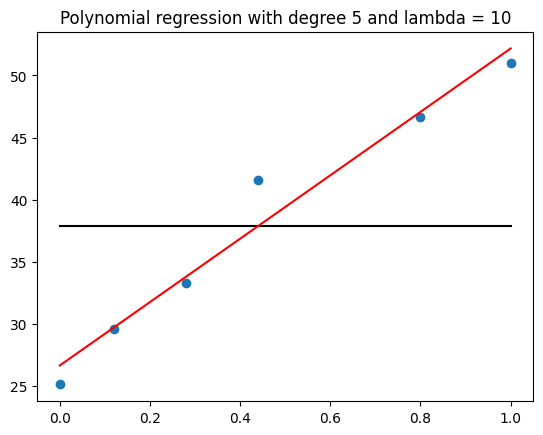

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


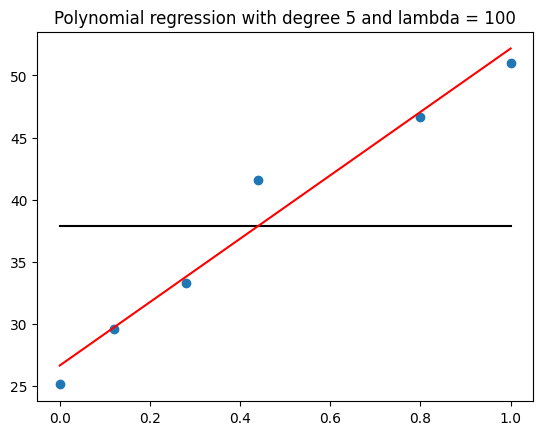

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


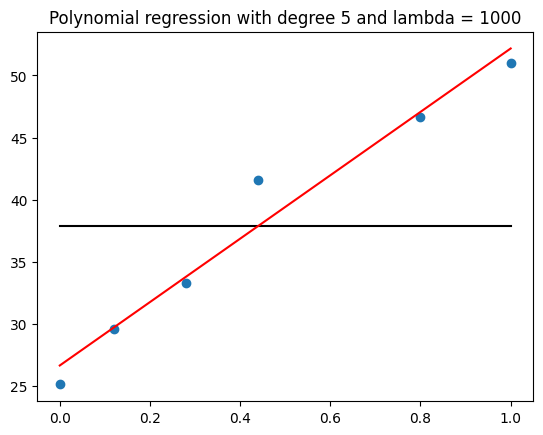

r2 score = 0.0
[0. 0. 0. 0. 0. 0.]


In [118]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1) # Between 0 and 1 we get 300 equally spaced values
lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda, more the regularization

for i in lambdas:
    degree = 5
    # Creating degree 5 features
    lassocoef = PolynomialFeatures(degree)
    # Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
    X_poly = lassocoef.fit_transform(X)
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_poly, y)
    # Plotting the ridge model
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,lassoreg.predict(lassocoef.fit_transform(X_seq)),color="black")
    plt.plot(X_seq,lr1.predict(X_seq),color="red")
    plt.title("Polynomial regression with degree "+str(degree) + " and lambda = " + str(i))
    plt.show()
    # Compute R^2
    y_pred = lassoreg.predict(lassocoef.fit_transform(X))
    print("r2 score = " + str(r2_score(y, y_pred)))
    print(lassoreg.coef_)

### Ridge and Lasso Regression for specific lambda value

#### Ridge Regression with lambda = 0.001

In [119]:
# Ridge Regression

ridgecoef = PolynomialFeatures(degree, include_bias = True) # Creating degree 5 features
# Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
X_poly = ridgecoef.fit_transform(X)
ridgereg = Ridge(alpha = 0.001) # Initialize the Ridge Regression model with a specific lambda
ridgereg.fit(X_poly, y) # fit the model on the polynomial features
print('Ridge Regression')
print(ridgereg.coef_)
y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
print("r2 score = " + str(r2_score(y, y_pred)))

Ridge Regression
[[  0.          35.89613711   3.18136705 -17.76646241  -9.85886283
   14.2964244 ]]
r2 score = 0.9877944050899673


#### Lasso Regression with lambda = 0.001

In [120]:
# Lasso Regression

lassocoef = PolynomialFeatures(degree) # Creating degree 5 features
# Transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
X_poly = lassocoef.fit_transform(X)
lassoreg = Lasso(alpha = 0.001)
lassoreg.fit(X_poly, y)
print('Lasso Regression')
print(lassoreg.coef_)
y_pred = lassoreg.predict(lassocoef.fit_transform(X))
print("r2 score = " + str(r2_score(y, y_pred)))

Lasso Regression
[ 0.00000000e+00  3.81657809e+01  8.34155093e-01 -2.41910940e+01
 -4.02313318e-04  1.12003111e+01]
r2 score = 0.9877652428687107
